In [1337]:
pip install google-play-scraper pandas


Note: you may need to restart the kernel to use updated packages.


In [1338]:

from google_play_scraper import Sort, reviews
import pandas as pd
# reviews() n sort() r functinos to fetch data --(reviws_data , continuation_token)

In [1339]:
# specify package name --> url frm playstore->truecaller page

In [1340]:
app_package = "com.truecaller"

In [1341]:
# create a sort dictionary 

In [1342]:
sort_options={
    'newest':Sort.NEWEST,
    'relevant':Sort.MOST_RELEVANT,
    'rating':Sort.RATING
}

In [1343]:
# sort by all 3 sort types - and convert dem to data frame - table formate n den save as csv file

In [1344]:
all_dfs = []

for label, sort_type in sort_options.items():
    try:
       fetched_reviews, _= reviews(
           app_package,
           lang ='en',
           country ='in',
           count = 2000,
           sort = sort_type
       )
       if fetched_reviews:
           df = pd.DataFrame(fetched_reviews)
           df['sort_type'] = label
           df= df[['userName','content','score','at']]
           df.columns =['user_name','review_text','rating','date']
           all_dfs.append(df)
    except:
        continue


In [1345]:
# combine al sort type into 1 csv file

In [1346]:
if all_dfs:
    combined_df = pd.concat(all_dfs, ignore_index=False)
    combined_df.to_csv('truecaller_reviews_all_sorts.csv',index=False)
    print("Combined reviews from all sort types saved in truecaller_all_sorts.csv")


In [1347]:
combined_df.head()



,user_name,review_text,rating,date,sentiment_score,sentiment_label
0,Reshma naushad Ansari,good,5,2025-06-25 20:27:53,0.4404,positive
1,Ravi Raj,godd,5,2025-06-25 20:26:54,0.0000,neutral
2,harshit dixit,phone hangs,1,2025-06-25 20:21:38,0.0000,neutral
3,Arbaz Khan,ट्रूकॉलर टीम से बस एक बात कहना है — इतना बड़ा ...,1,2025-06-25 20:19:56,0.0000,neutral
4,Kendruka Pandu,super exlent,4,2025-06-25 20:19:37,0.5994,positive


In [1348]:
import pandas as pd
import re
# regular expression for cleaning
import nltk
# to remove useless/stopwords owrds llike is the in
from nltk.corpus import stopwords
df=pd.read_csv("truecaller_reviews_all_sorts.csv")
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eshas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1349]:
print(list(stop_words)[:5])  # Should show: ['i', 'me', 'my', ...]


['its', 'than', 'their', 'through', 'hadn']


In [1350]:
# using regualr expression

In [1351]:
import re
import pandas as pd

def clean_text(text):
    try:
        
        if pd.isnull(text): 
            return ""
        if not isinstance(text,str):
            text= str(text)
        text = text.lower()
        text =re.sub(r'[^\w\s]','',text)
        text = re.sub(r'\d+','',text)
        words = text.split()
        words = [word for word in words if word not in stop_words]
        return ' '.join(words)
    except Exception as e:
        print(f"error in clean_text:{e}")
        return ""
       

In [1352]:
df['cleaned_review'] = df['review_text'].apply(clean_text)

In [1353]:
# applies clean_text() fun to ervy reviw in coloumn review_textn saved in cleaned_review

In [1354]:
print(df[['review_text', 'cleaned_review']].head(10))

                                         review_text  \
0                                               good   
1                                               godd   
2                                        phone hangs   
3  ट्रूकॉलर टीम से बस एक बात कहना है — इतना बड़ा ...   
4                                       super exlent   
5  started getting more unsolicited marketing cal...   
6                                               nice   
7                                               best   
8                                               good   
9                                              supar   

                                      cleaned_review  
0                                               good  
1                                               godd  
2                                        phone hangs  
3  टरकलर टम स बस एक बत कहन ह इतन बड ऐप बनकर भ एक ...  
4                                       super exlent  
5  started getting unsolicited marketing calls ac... 

In [1355]:
print(df.columns)


Index(['user_name', 'review_text', 'rating', 'date', 'cleaned_review'], dtype='object')


In [1356]:
# about premium

In [1357]:
premium_reviews = combined_df[
    combined_df['review_text'].str.contains(
        'blue crown|gold crown|premium|ad-free|ads|bug',
        case=False,
        na=False
    )
]

print(df[['review_text', 'cleaned_review']].head(10))

                                         review_text  \
0                                               good   
1                                               godd   
2                                        phone hangs   
3  ट्रूकॉलर टीम से बस एक बात कहना है — इतना बड़ा ...   
4                                       super exlent   
5  started getting more unsolicited marketing cal...   
6                                               nice   
7                                               best   
8                                               good   
9                                              supar   

                                      cleaned_review  
0                                               good  
1                                               godd  
2                                        phone hangs  
3  टरकलर टम स बस एक बत कहन ह इतन बड ऐप बनकर भ एक ...  
4                                       super exlent  
5  started getting unsolicited marketing calls ac... 

In [1358]:
print(df.columns)

Index(['user_name', 'review_text', 'rating', 'date', 'cleaned_review'], dtype='object')


In [1359]:
# sentiment analysis code using tool textblob

In [1360]:
!pip install textblob
from textblob import TextBlob
!pip install langdetect
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException


In [1361]:
def get_sentiment(text):
    if not text or pd.isnull(text):
        return 0
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [1362]:
df['sentiment_score'] = df['cleaned_review'].apply(get_sentiment)


In [1363]:
def label_sentiment(score):
    if score>0.1:
        return "positive"
    elif score<-0.1:
        return "negative"
    else:
        return "Neutral"
    

In [1364]:
df['sentiment'] = df['sentiment_score'].apply(label_sentiment)
print(df[['review_text', 'cleaned_review', 'sentiment_score', 'sentiment']].head(5))



                                         review_text  \
0                                               good   
1                                               godd   
2                                        phone hangs   
3  ट्रूकॉलर टीम से बस एक बात कहना है — इतना बड़ा ...   
4                                       super exlent   

                                      cleaned_review  sentiment_score  \
0                                               good         0.700000   
1                                               godd         0.000000   
2                                        phone hangs         0.000000   
3  टरकलर टम स बस एक बत कहन ह इतन बड ऐप बनकर भ एक ...         0.000000   
4                                       super exlent         0.333333   

  sentiment  
0  positive  
1   Neutral  
2   Neutral  
3   Neutral  
4  positive  


In [1365]:
print(df['sentiment'].value_counts())

sentiment
positive    3929
Neutral     1475
negative     596
Name: count, dtype: int64


In [1366]:
print(df['sentiment'].value_counts(normalize=True)*100)


sentiment
positive    65.483333
Neutral     24.583333
negative     9.933333
Name: proportion, dtype: float64


In [1367]:

# about premium

In [1368]:
!pip install vaderSentiment


In [1464]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    try:
        return analyzer.polarity_scores(text)['compound']
    except:
        return 0
combined_df['sentiment_score'] = combined_df['review_text'].apply(get_vader_sentiment)

def label_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

combined_df['sentiment_label'] = combined_df['sentiment_score'].apply(label_sentiment)





In [1370]:
# count - percentage

In [1466]:
print(premium_reviews.columns)


Index(['user_name', 'review_text', 'rating', 'date', 'sentiment_score',
       'sentiment_label'],
      dtype='object')


In [1372]:
# word frequency analysis

In [1373]:
print(neg_premium_reviews.columns)


Index(['user_name', 'review_text', 'rating', 'date', 'sentiment_score',
       'sentiment_label', 'sentiment'],
      dtype='object')


In [1374]:
# wt drives dissatisfaction

In [1375]:
!pip install wordcloud


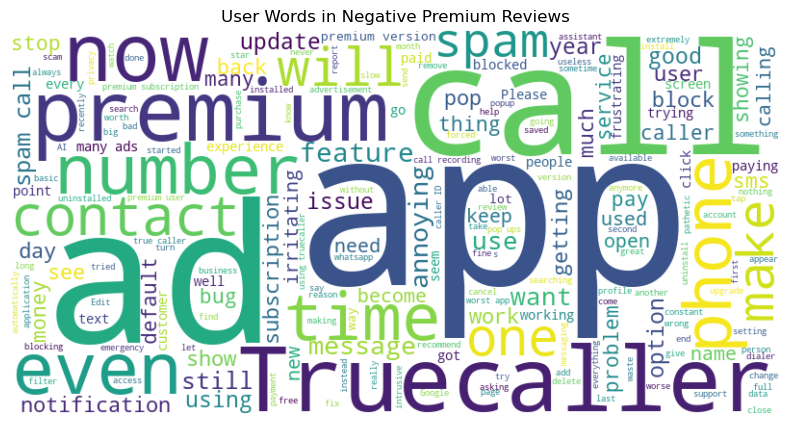

In [1376]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

neg_text = ' '.join(
    premium_reviews[premium_reviews['sentiment_label'] == 'negative']['review_text'].dropna()
)

wc = WordCloud(width=800, height=400, background_color='white').generate(neg_text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("User Words in Negative Premium Reviews")
plt.show()


In [1377]:
# complains of ads 

In [1378]:

import re
from collections import Counter

keywords = ['ads', 'ad-free', 'identity', 'tag', 'UI', 'interface']
counts = Counter()

for review in premium_reviews['review_text'].dropna():
    words = re.findall(r'\b\w+\b', review.lower())
    for kw in keywords:
        if kw.lower() in words:
            counts[kw] += 1

print(counts)


Counter({'ads': 460, 'interface': 25, 'UI': 17, 'identity': 10, 'tag': 1})


In [1379]:
# bugs users face

In [1380]:
bug_reviews = premium_reviews[premium_reviews['review_text'].str.contains('bug|crash|error|issue|problem', case=False, na=False)]
print(bug_reviews[['review_text', 'sentiment_label']].head(10))


                                            review_text sentiment_label
64    The problem is am trying to make payment on pr...        negative
135   bug in the subscription page. I am not able to...        positive
438                                                bugs         neutral
824   so many difficulties makes snapchat aads .in e...        negative
948   I have been using this app for more than 5year...        positive
1136  I am a premium user and facing these issues la...        positive
1353  worst app ever it even block calls from deliva...        negative
1970  don't install this app...non stop ads and lots...        negative
2     Dear Truecaller, Thank you for your excellent ...         neutral
7     Truecaller is a popular caller ID and spam blo...        positive


In [1468]:
premium_reviews.to_csv('truecaller_premium_feature_reviews.csv', index=False)


In [1382]:
# language detection - fro multi langues

In [1383]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

DetectorFactory.seed = 0  # Make detection consistent

def reliable_lang_detect(text):
    try:
        if not isinstance(text, str) or text.strip() == "":
            return "unknown"

        # If text is very short (1–2 words), assume it's English
        if len(text.split()) <= 2:
            return "en"

        return detect(text)

    except LangDetectException:
        return "unknown"



In [1384]:
df['language'] = df['cleaned_review'].apply(reliable_lang_detect)


In [1385]:
print(df[['review_text', 'cleaned_review', 'sentiment_score', 'sentiment']].head(5))

                                         review_text  \
0                                               good   
1                                               godd   
2                                        phone hangs   
3  ट्रूकॉलर टीम से बस एक बात कहना है — इतना बड़ा ...   
4                                       super exlent   

                                      cleaned_review  sentiment_score  \
0                                               good         0.700000   
1                                               godd         0.000000   
2                                        phone hangs         0.000000   
3  टरकलर टम स बस एक बत कहन ह इतन बड ऐप बनकर भ एक ...         0.000000   
4                                       super exlent         0.333333   

  sentiment  
0  positive  
1   Neutral  
2   Neutral  
3   Neutral  
4  positive  


In [1386]:
import sqlite3
conn = sqlite3.connect('truecaller_reviews.db')
df.to_sql('review_analysis',conn,if_exists='replace',index=False)
print(pd.read_sql_query("SELECT*FROM review_analysis LIMIT 5" , conn))


               user_name                                        review_text  \
0  Reshma naushad Ansari                                               good   
1               Ravi Raj                                               godd   
2          harshit dixit                                        phone hangs   
3             Arbaz Khan  ट्रूकॉलर टीम से बस एक बात कहना है — इतना बड़ा ...   
4         Kendruka Pandu                                       super exlent   

   rating                 date  \
0       5  2025-06-25 20:27:53   
1       5  2025-06-25 20:26:54   
2       1  2025-06-25 20:21:38   
3       1  2025-06-25 20:19:56   
4       4  2025-06-25 20:19:37   

                                      cleaned_review  sentiment_score  \
0                                               good         0.700000   
1                                               godd         0.000000   
2                                        phone hangs         0.000000   
3  टरकलर टम स बस एक बत कहन ह

In [1470]:
import re

def clean_and_detect(text):
    try:
        if not isinstance(text, str) or text.strip() == "":
            return "unknown"

        # Remove emojis/symbols to check if only symbols
        stripped = re.sub(r'[^\w\s]', '', text)
        if stripped.strip() == "":
            return "emoji"

        if len(text.split()) <= 2:
            return "en"

        return detect(text)

    except LangDetectException:
        return "unknown"


In [1388]:
df['language'] = df['cleaned_review'].apply(clean_and_detect)


In [1389]:

pd.read_sql_query("SELECT * FROM review_analysis LIMIT 5", conn)


,user_name,review_text,rating,date,cleaned_review,sentiment_score,sentiment,language
0,Reshma naushad Ansari,good,5,2025-06-25 20:27:53,good,0.700000,positive,en
1,Ravi Raj,godd,5,2025-06-25 20:26:54,godd,0.000000,Neutral,en
2,harshit dixit,phone hangs,1,2025-06-25 20:21:38,phone hangs,0.000000,Neutral,en
3,Arbaz Khan,ट्रूकॉलर टीम से बस एक बात कहना है — इतना बड़ा ...,1,2025-06-25 20:19:56,टरकलर टम स बस एक बत कहन ह इतन बड ऐप बनकर भ एक ...,0.000000,Neutral,hi
4,Kendruka Pandu,super exlent,4,2025-06-25 20:19:37,super exlent,0.333333,positive,en


In [1390]:
import os
print(os.getcwd())


C:\Users\eshas


In [1391]:
import os
print(os.listdir())


['.anaconda', '.android', '.conda', '.condarc', '.continuum', '.gradle', '.ipynb_checkpoints', '.ipython', '.jdks', '.jupyter', '.matplotlib', '.vscode', 'anaconda3', 'AndroidStudioProjects', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Creative Cloud Files Personal Account eshascs@gmail.com 39D904DB620376C10A495EDD@AdobeID', 'CrossDevice', 'Documents', 'Downloads', 'Favorites', 'Links', 'Local Settings', 'Microsoft', 'Music', 'My Documents', 'NetHood', 'ntuser.dat', 'ntuser.dat.log1', 'ntuser.dat.log2', 'NTUSER.DAT{da6b11b1-0307-11ef-af11-00deabcaa9db}.TM.blf', 'NTUSER.DAT{da6b11b1-0307-11ef-af11-00deabcaa9db}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{da6b11b1-0307-11ef-af11-00deabcaa9db}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.dat{fa6b85bb-231c-11f0-af6f-b047e99f4b9b}.TM.blf', 'ntuser.dat{fa6b85bb-231c-11f0-af6f-b047e99f4b9b}.TMContainer00000000000000000001.regtrans-ms', 'ntuser.dat{fa6b85bb-231c-11f0-af6f-b047e99f4b9b}.TMContainer0000000000000

In [1392]:
premium_reviews['sentiment_label'].value_counts(normalize=True)



sentiment_label
positive    0.477273
negative    0.442149
neutral     0.080579
Name: proportion, dtype: float64